<h1 align='center'>Machine Learning Modeling of Abalone Data</h1>
<h4 align='center'>by Wilfred Morgan</h4>

![alt text](https://images-na.ssl-images-amazon.com/images/I/41mIZXrtvVL._SL500_AC_SS350_.jpg)

<a id='toc'></a>
#### Table of Contents
* [Problem Definition](#defineproblem)
* [Exploratory Data Analysis](#eda)
    * [Peek at Data](#1stlook)
    * [Initial Visualization](#visual1)
* [Data Preparation](#dataprep)
    * [Examine Correlation Between Variables](#correlation)
    * [Split the Data into Training and Test sets](#train_test_split)
* [Algorithm Evaluation](#algoselect)
    * [Simple Linear Regression](#linear_regression)
        - [Linear Regression Validation](#slr_validate)
    * [LASSO Modeling](#lasso)
        - [LASSO Model Validation](#lasso_validate)
    * [Principal Component Analysis (PCA)](#pca)
        - [PCA Model Validation](#pca_validate)
    * [Neural Network](#nn)
        - [Neural Network Validation](#nn_validate)
            - [Activation Selection](#activation)
            - [Regularization Parameter Selection](#regularization)
            - [Hidden Layer Architecture Selection](#hiddenlayer)
            - [Learning Rate Selection](#learningrate)
* [Model Training](#modeling)
* [Deployment Preparation](#deployprep)


---
<a id='defineproblem'></a>

## Problem Definition
[Table of Contents](#toc)

### Description
[Table of Contents](#toc) | [Section](#defineproblem)
#### Informal problem definition:
Predict the age of abalone from physical measurements

#### Formal problem definition:
Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. 

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

#### Problem assumptions:
* Dataset contains accurate observations
* No missing values in the dataset
* Data format is already prepared for importing and analysis


#### Similar problems:
* Iris Plant Class Prediction Model

### Motivation
[Table of Contents](#toc) | [Section](#defineproblem)
#### Description:
To practice building a prediction model using machine learning techniques.

#### Solution Benefits (model predictions)
* Gain a deeper understanding of machine learning techniques.
* Obtain more experience with Python and data science projects.
* Can adapt model to other projects.

#### Solution Application
The model could be used for other problems that require prediction analysis.

### Manual Solution
[Table of Contents](#toc) | [Section](#defineproblem)

#### How is the problem currently solved
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.

#### How would a subject matter expert make manual predictions
Predict age based on size of abalone.

#### How a programmer might hand code a solution
Write a program that estimates the age based on the overall size of the abalone.
It would return an age range based on the size.

---
<a id='eda'></a>

## Exploratory Data Analysis
[Table of Contents](#toc)

### Basic Information
[Table of Contents](#toc) | [Section](#defineproblem)
* Number of instances: **4177**
* Number of attributes: **8**
* Target variable: **Age**

#### Attribute information:
Given is the attribute name, attribute type, the measurement unit and a brief description.  The number of rings is the value to predict: either as a continuous value or as a classification problem.
<html>
<table align='left'>
    <th>Name</th>
    <th>Data Type</th>
    <th>Meas.</th>
    <th>Description</th>
     <tr>
        <td>Sex</td>
        <td>nominal</td>
        <td></td>
        <td>M, F, and I (infant)</td>
     </tr>  
     <tr>    
        <td>Length</td>
        <td>continuous</td>
        <td>mm</td>
        <td>Longest shell measurement</td>
     </tr>   
     <tr>   
        <td>Diameter</td>
        <td>continuous</td>
        <td>mm</td>
        <td>perpendicular to length</td> 
     </tr>   
     <tr>   
        <td>Height</td>
        <td>continuous</td>
        <td>mm</td> 
        <td>with meat in shell</td>
     </tr>
    <tr>
        <td>Whole weight</td>
        <td>continuous</td>
        <td>grams</td>
        <td>whole abalone</td>
    </tr>
    <tr>
        <td>Shucked weight</td>
        <td>continuous</td>
        <td>grams</td>
        <td>weight of meat</td>
    </tr>
    <tr>
        <td>Viscera weight</td>
        <td>continuous</td>
        <td>grams</td>
        <td>gut weight (after bleeding)</td>
    </tr>
    <tr>
        <td>Shell weight</td>
        <td>continuous</td>
        <td>grams</td>
        <td>after being dried</td>
    </tr>     
    <tr>
        <td>Rings</td>
        <td>integer</td>
        <td></td>
        <td>+1.5 gives the age in years</td>
     </tr>
     <tr>    
</table>
</html>

In [1]:
# Import Libaries
import pandas as pd
import numpy as np

In [2]:
# Import Data
data_location = "/Users/wmemorgan/Google Drive/Computer_Data_Science_Lab/abalone/data/02_prepared_data/abalone.data"
column_names = ['Sex','Length','Diameter','Height','Whole_Weight',
                'Shucked_Weight','Viscera_Weight','Shell_Weight','Rings']
data = pd.read_csv(data_location, names=column_names)

### Display Sample Data
[Table of Contents](#toc) | [Section](#defineproblem)

In [3]:
#Verify number of observations
len(data)

4177

In [4]:
# Shape
print(data.shape)

(4177, 9)


<a id='1stlook'></a>
### Peek at the Data

In [5]:
data.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole_Weight      4177 non-null float64
Shucked_Weight    4177 non-null float64
Viscera_Weight    4177 non-null float64
Shell_Weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
data.describe()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
# Class distribution by Gender
print(data.groupby('Sex').size())

Sex
F    1307
I    1342
M    1528
dtype: int64


In [9]:
# Class distribution by Rings
print(data.groupby('Rings').size())

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
dtype: int64


<a id='visual1'></a>
### Initial Visualization
[Table of Contents](#toc) | [Section](#defineproblem)

In [10]:
# Import Libaries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#### Univariate Plots

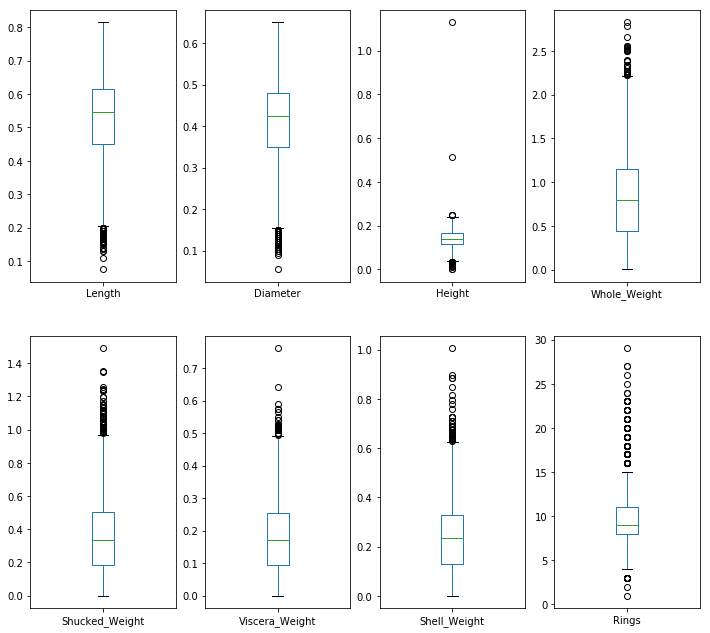

In [11]:
# box and whisker plots
data.plot(kind='box', subplots=True, layout=(2,4), figsize=(12,11), sharex=False, sharey=False)
plt.show()

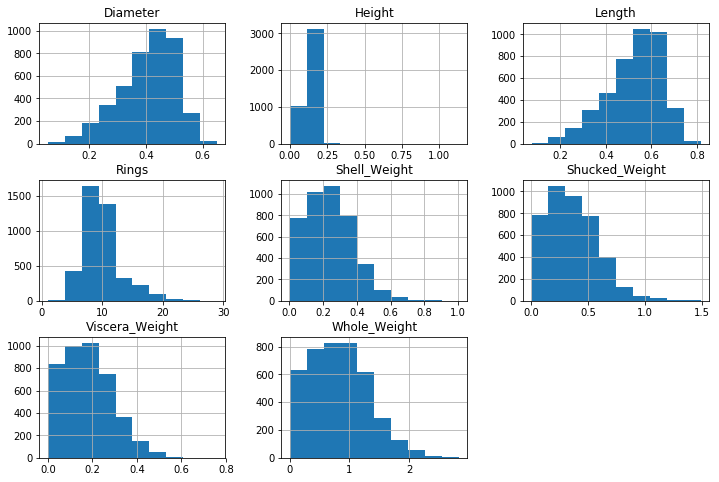

In [12]:
# histograms
data.hist(figsize=(12,8))
plt.show()

#### Multivariate Plots

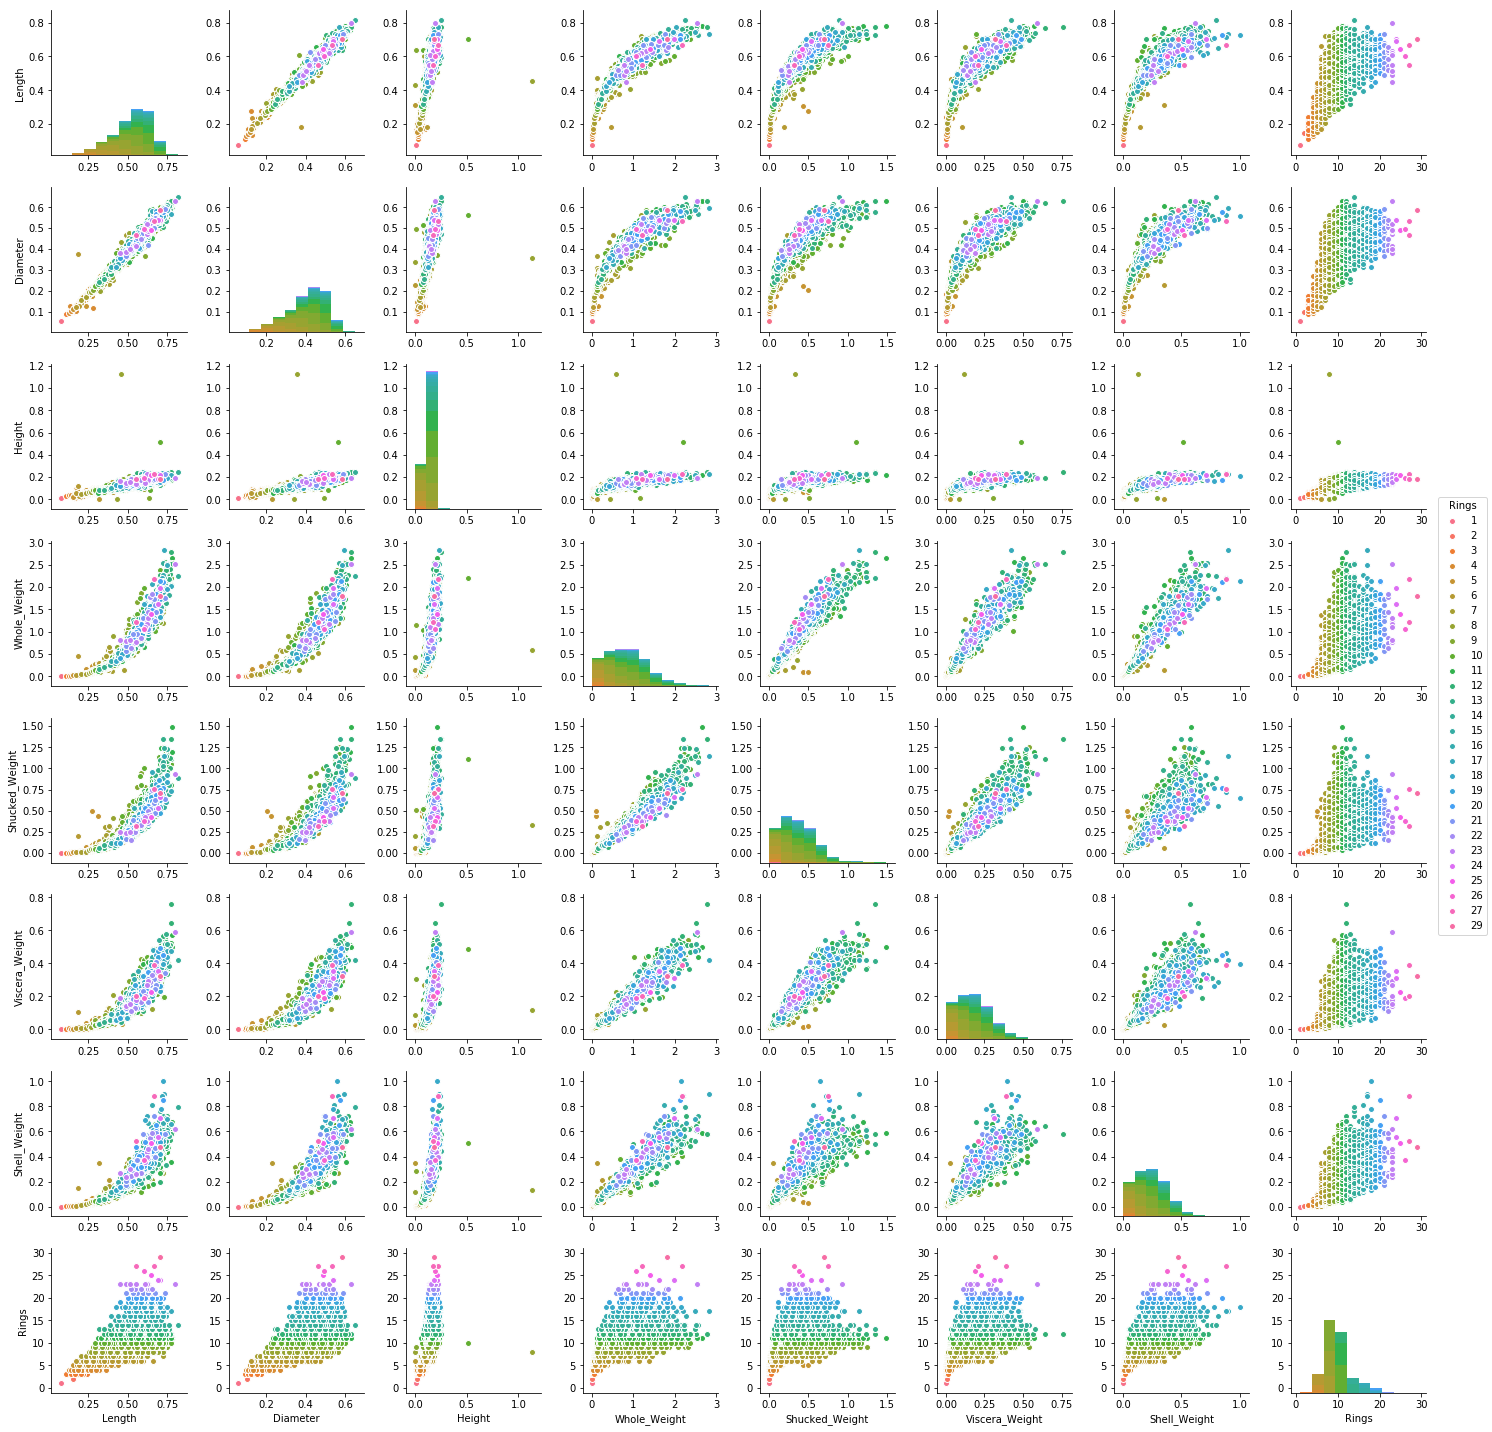

In [13]:
sns.pairplot(data=data, hue="Rings")
plt.show()

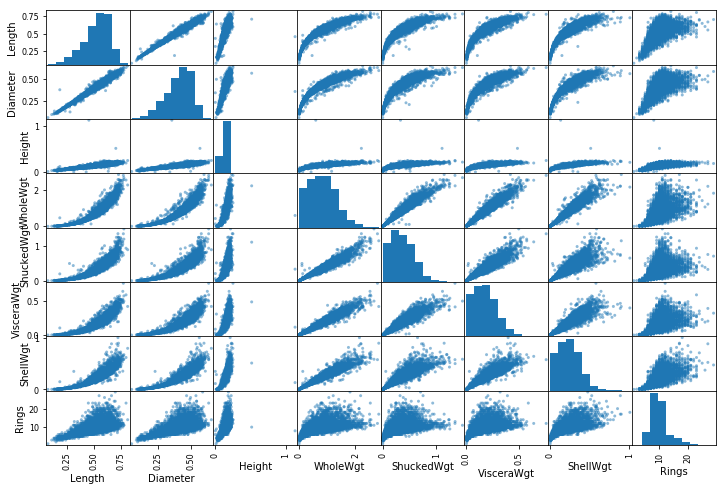

In [33]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(12,8))

plt.show()

## EDA Notes
* Will have to create dummy variables for the gender attribute
* The minium value for height is 0 which means there are some anomolies in the observations.


---


<a id='dataprep'></a>
## Data Preparation
[Table of Contents](#toc)

#### To Do:
* Create dummy variables for gender attributes
* Investigate and filter observations with 0mm height. 

In [14]:
# Create dummy variables for gender attribute
data['Male'] = (data['Sex'] == 'M').astype(int)
data['Female'] = (data['Sex'] == 'F').astype(int)
data['Infant'] = (data['Sex'] == 'I').astype(int)

In [15]:
print(data.shape)

(4177, 12)


In [16]:
data.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings,Male,Female,Infant
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1,0,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,0,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,1,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,0,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0,1


In [17]:
data.describe()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings,Male,Female,Infant
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.365813,0.312904,0.321283
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.481715,0.463731,0.467025
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000,1.000000


In [18]:
data[data['Height'] == 0]

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings,Male,Female,Infant
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,0,0,1
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,0,0,1


In [19]:
# Filter out observations with 0mm in height
data = data[data['Height'] > 0]

In [20]:
len(data)

4175

<a id='correlation'></a>
### Examine correlation between variables
[Table of Contents](#toc) | [Section](#dataprep)

**NOTE:** *The Kendall Tau correlation method will be used since it can also address non-linear correlations.*

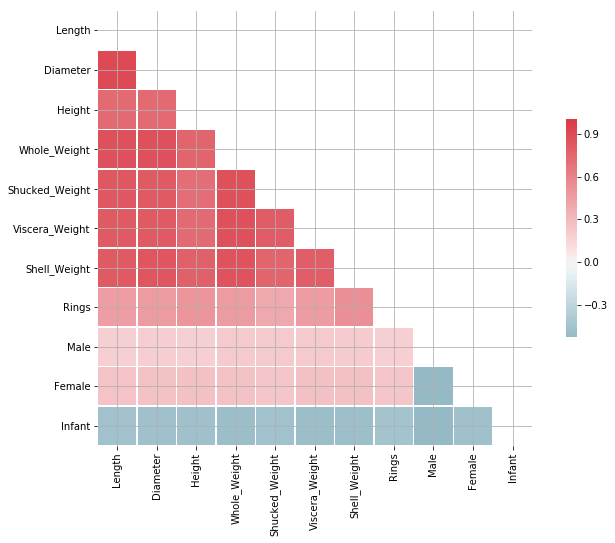

In [93]:
#This correlation coefficicent matrix follows the 
#example from the seaborn example:
#http://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Compute the correlation matrix
corr = data.corr('kendall')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.grid()
plt.show()

#### Correlation observations
* There is a strong correlation among the weight and size attributes.
* Can reduce the number of attributes without affecting model accuracy.

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings,Male,Female,Infant
Length,1.000000,0.908066,0.734708,0.872458,0.835543,0.826177,0.824188,0.456897,0.196090,0.253480,-0.454124
Diameter,0.908066,1.000000,0.747634,0.873677,0.824389,0.820198,0.840825,0.473740,0.200499,0.260219,-0.465368
Height,0.734708,0.747634,1.000000,0.771407,0.712090,0.748426,0.782640,0.509180,0.196829,0.266542,-0.467862
Whole_Weight,0.872458,0.873677,0.771407,1.000000,0.879546,0.870659,0.862819,0.476016,0.215068,0.262062,-0.482231
Shucked_Weight,0.835543,0.824389,0.712090,0.879546,1.000000,0.809565,0.765064,0.398754,0.212089,0.238800,-0.456050
Viscera_Weight,0.826177,0.820198,0.748426,0.870659,0.809565,1.000000,0.798135,0.460982,0.210297,0.269492,-0.484689
Shell_Weight,0.824188,0.840825,0.782640,0.862819,0.765064,0.798135,1.000000,0.535029,0.207412,0.265064,-0.477313
Rings,0.456897,0.473740,0.509180,0.476016,0.398754,0.460982,0.535029,1.000000,0.187154,0.242982,-0.434477
Male,0.196090,0.200499,0.196829,0.215068,0.212089,0.210297,0.207412,0.187154,1.000000,-0.512900,-0.522349
Female,0.253480,0.260219,0.266542,0.262062,0.238800,0.269492,0.265064,0.242982,-0.512900,1.000000,-0.464113


<a id='train_test_split'></a>
### Split the data into training and test sets
[Table of Contents](#toc) | [Section](#dataprep)

In [27]:
# Import library and set test split parameters
from sklearn.model_selection import train_test_split
test_size = 0.3
seed = 7

In [28]:
# Split data into training and test datasets
train, test = train_test_split(data, test_size = test_size, random_state=seed)

In [29]:
# Assign X and y axes
X_train = train.drop(['Rings', 'Sex', 'Female'],axis=1)
y_train = train['Rings']
X_test = test.drop(['Rings', 'Sex', 'Female'],axis=1)
y_test = test['Rings']

In [34]:
# Verify attributes
print('Number of attributes in the training set: ', len(X_train.columns))
print('Training attributes are: ')
print(X_train.columns)
print('\n')
print('Number of attributes in the test set: ', len(X_test.columns))
print('Test attributes are: ')
print( X_test.columns)

Number of attributes in the training set:  9
Training attributes are: 
Index(['Length', 'Diameter', 'Height', 'Whole_Weight', 'Shucked_Weight',
       'Viscera_Weight', 'Shell_Weight', 'Male', 'Infant'],
      dtype='object')


Number of attributes in the test set:  9
Test attributes are: 
Index(['Length', 'Diameter', 'Height', 'Whole_Weight', 'Shucked_Weight',
       'Viscera_Weight', 'Shell_Weight', 'Male', 'Infant'],
      dtype='object')


---
<a id='algoselect'></a>

## Algorithm Evaluation
[Table of Contents](#toc)

We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 3 different algorithms:

    1. Muliple Regression
    2. Principal Component Analysis (PCA)
    3. Neural Networks
    
Let’s build and evaluate our models:

In [35]:
# Import Algorithm Libraries
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

<a id='linear_regression'></a>
### Simple Linear Regression
[Table of Contents](#toc) | [Section](#algoselect)

In [36]:
# Fitting Linear Regression Model to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
#Take a look at the regression coefficients
dict(zip(list(X_train.columns), regressor.coef_))

{'Diameter': 6.9814284468743635,
 'Height': 24.680866409681514,
 'Infant': -0.69777636243297547,
 'Length': 1.2770253922183885,
 'Male': 0.12552781927811749,
 'Shell_Weight': 6.3645338382963219,
 'Shucked_Weight': -20.361090115067476,
 'Viscera_Weight': -11.079121087851616,
 'Whole_Weight': 9.3157493772331215}

<a id='slr_validate'></a>
### Simple Linear Regression Validation
[Table of Contents](#toc) | [Section](#algoselect)

#### Calculate the mean absolute error (MAE)

#### Plot the MAE on a Y vs. YHat plot

In [38]:
# Create Y-YHat plot function
def plot_yyhat(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    #A trick to get format the plot scaling by explicitly
    #including the minimum and maximum values for 
    #the test data and predicted values
    absmin = min([y_test.min(), y_pred.min()])
    absmax = max([y_test.max(), y_pred.max()])
    
    # Create the chart
    ax = plt.axes()
    ax.scatter(y_test, y_pred)
    ax.set_title('Y vs. YHat')
    ax.axis([absmin, absmax, absmin, absmax])
    ax.plot([absmin, absmax], [absmin, absmax],c='black')
    ax.set_ylabel('Predicted Rings')
    ax.set_xlabel('Actual Rings')
    
    #Plot the text box
    props = {'boxstyle':'round','facecolor':'wheat','alpha':0.5}
    textStr = '$MAE=%.3f$\n$R2=%.3f$' % (mae, r2)
    ax.text(0.05, 0.95, textStr, transform=ax.transAxes, fontsize=14,
               verticalalignment='top',bbox=props)

In [39]:
# Predicting the age
y_pred = regressor.predict(X_test)

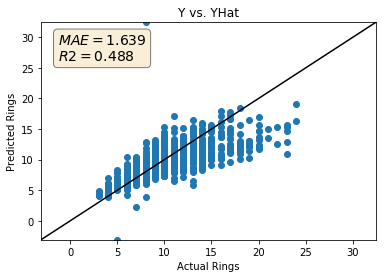

In [40]:
# Display chart
plot_yyhat(y_test, y_pred)

#### Regression Observations
* The prediction seems to get worse as the actual number of rings increases
* The mean absolute error does not seem adequate. Expected MAE is around 0.5.

**QUESTION TO ASK**
* What target accuracy needs to be achieved for the researchers to stop manually counting rings?

**Next Steps**
Improve the model (and the chance of overfitting) by reducing the number of explanatory factors to only those which are necessary, which may improve prediction accuracy as well if overfitting is present.

<a id='lasso'></a>
### LASSO Modeling
[Table of Contents](#toc) | [Section](#algoselect)

Since many of the factors were highly related (according to the Kendall Tau metric calculated in a previous section), it is likely that an accuracy close to 1.66 can still be achieved with fewer explanatory factors.

There are many algorithms which could be used for this purpose, but let’s try a regularization method called Least Absolute Shrinkage and Selection Operator (LASSO). Regularization methods are designed to reduce overfitting by imposing penalties on the regression model. In this case, LASSO is a good choice because it can reduce the coefficients of unnecessary factors to zero, effectively reducing the number of explanatory factors in the model.

The following code will construct a LASSO model, using cross-validation to select an appropriate alpha, which is a required hyperparameter for the LASSO model. Essentially, the method will divide the dataset into 20 (or user-modifiable) different partitions and determine the best alpha value for each partition. Then, the average alpha across all folds will be selected.

*Note- the regulatization path figure was originally from an example here:

[http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html](http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html)

In [41]:
# Fitting Muliple Linear Regression to the Training set
from sklearn.linear_model import LassoCV
num_cv = 20
lasso_model = LassoCV(cv=num_cv).fit(X_train, y_train)

(-0.078111083202234144,
 3.2218889167977656,
 2.429326207309928,
 15.45782850149709)

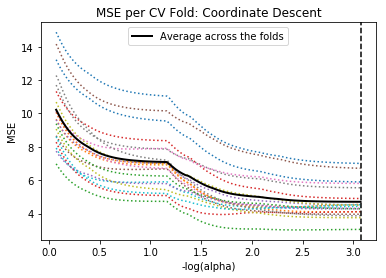

In [42]:
# Creating the chart
m_log_alphas = -np.log10(lasso_model.alphas_)
ax = plt.axes()
ax.plot(m_log_alphas, lasso_model.mse_path_, ':')
ax.plot(m_log_alphas, lasso_model.mse_path_.mean(axis=1),'black',
       label='Average across the folds',linewidth=2)
ax.axvline(-np.log10(lasso_model.alpha_), linestyle='--', color='black')
ax.legend()
ax.set_xlabel('-log(alpha)')
ax.set_ylabel('MSE')
ax.set_title('MSE per CV Fold: Coordinate Descent')
ax.axis('tight')

In [43]:
#Let’s examine the new coefficients from the lasso model:
dict(zip(list(X_train.columns),lasso_model.coef_))

{'Diameter': 6.7380394287823187,
 'Height': 22.120202393918547,
 'Infant': -0.71565827101252044,
 'Length': 1.3848926055278519,
 'Male': 0.11829978811583884,
 'Shell_Weight': 7.1363503878915733,
 'Shucked_Weight': -19.682753051798976,
 'Viscera_Weight': -9.3800897973271944,
 'Whole_Weight': 8.6304016128935803}

#### Observations
The information contained in “Length” is probably adequately duplicated across similar factors, such as diameter.

Next, let’s look at the Y-Yhat plot (using the same function as defined earlier):

In [44]:
# Predicting the age using Lasso Model
y_pred2 = lasso_model.predict(X_test)

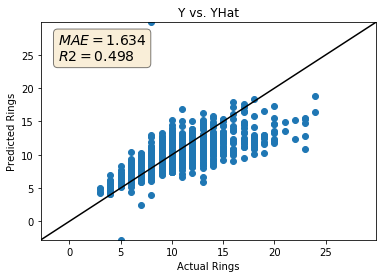

In [45]:
plot_yyhat(y_test, y_pred2)

The mean absolute error was roughly the same as before, but less explanatory factors were used, the chance of overfitting is reduced, and the model is simplified.

<a id='lasso_validate'></a>
### LASSO Model Validation
[Table of Contents](#toc) | [Section](#algoselect)

Validate the constructed Lasso model. First, let’s look at the residuals plotted against each explanatory factor, which should show no dependency.

In [46]:
# Plot residuals function
def plotResiduals(currentAxis, xData, xLab, y_residual):
    currentAxis.scatter(xData, y_residual)
    currentAxis.set_title('Residuals vs. {}'.format(xLab))
    currentAxis.set_ylabel('Residual Value')
    currentAxis.set_xlabel(xLab)
    minVal, maxVal = min(xData), max(xData)
    currentAxis.plot([minVal,maxVal],[0,0],c='green')

In [47]:
# Calculate residual values
y_residuals = y_pred2 - y_test

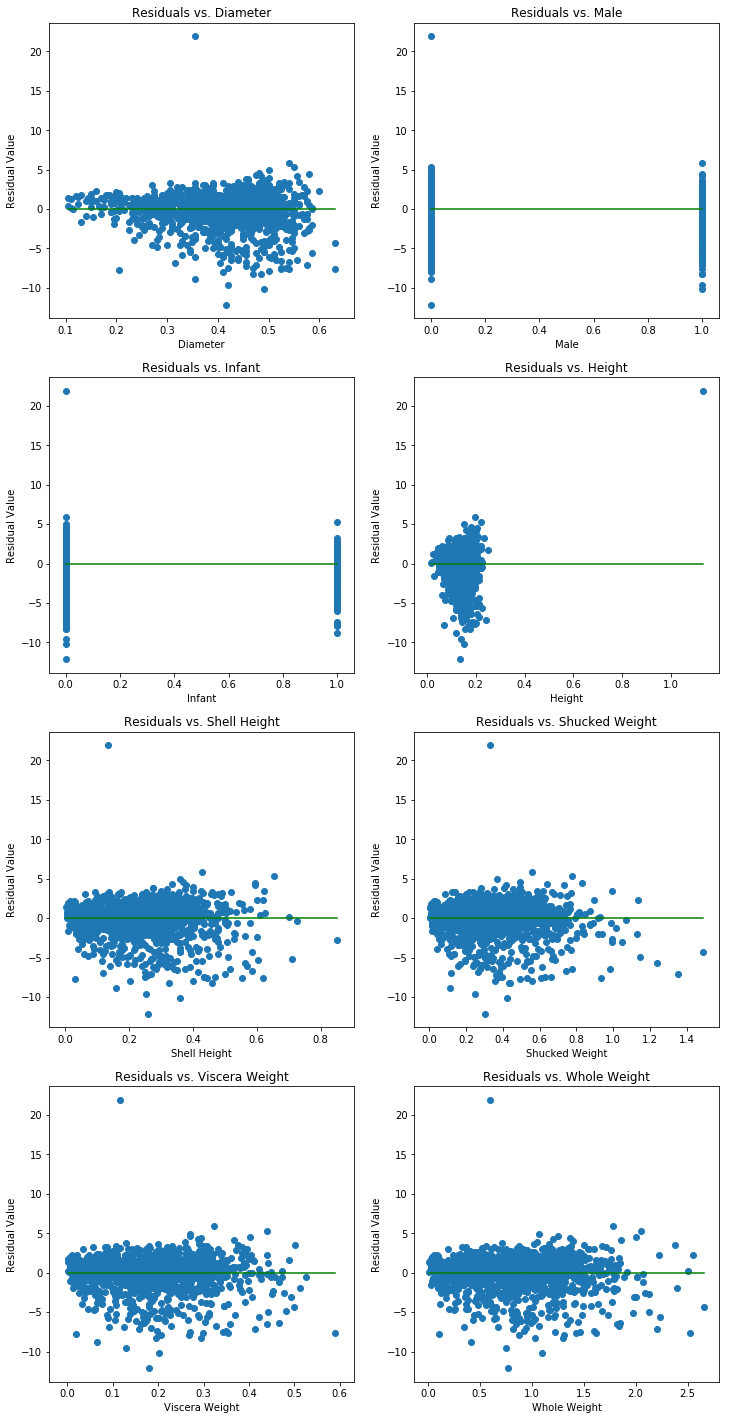

In [48]:
# Create chart
f,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(12,25))
plotResiduals(ax1,X_test['Diameter'],'Diameter',y_residuals)
plotResiduals(ax2,X_test['Male'],'Male',y_residuals)
plotResiduals(ax3,X_test['Infant'],'Infant',y_residuals)
plotResiduals(ax4,X_test['Height'],'Height',y_residuals)
plotResiduals(ax5,X_test['Shell_Weight'],'Shell Height',y_residuals)
plotResiduals(ax6,X_test['Shucked_Weight'],'Shucked Weight',y_residuals)
plotResiduals(ax7,X_test['Viscera_Weight'],'Viscera Weight',y_residuals)
plotResiduals(ax8,X_test['Whole_Weight'],'Whole Weight',y_residuals)

##### Snippet
```python
plotResiduals(ax0,X_test['Diameter'],'Diameter',y_residuals)
plotResiduals(ax1,X_test['Male'],'Male',y_residuals)
plotResiduals(ax2,X_test['Infant'],'Infant',y_residuals)
plotResiduals(ax3,X_test['Height'],'Height',y_residuals)
plotResiduals(ax4,X_test['Shell_Weight'],'Shell Height',y_residuals)
plotResiduals(ax5,X_test['Shucked_Weight'],'Shucked Weight',y_residuals)
plotResiduals(ax6,X_test['Viscera_Weight'],'Viscera Weight',y_residuals)
plotResiduals(ax7,X_test['Whole_Weight'],'Whole Weight',y_residuals)

for ax in range(len(X_test)-1):
    plotResiduals(ax, X_test.iloc[:,ax], X_test.iloc[:,ax].name, y_residuals)
```

#### Examine distribution of the residuals

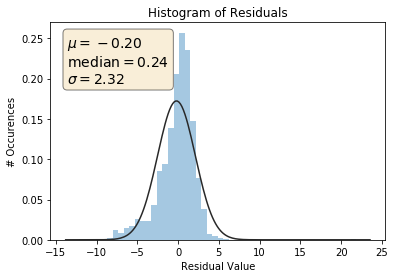

In [49]:
#Create the distribution chart
ax = plt.axes()
sns.distplot(y_residuals,ax=ax,kde=False,fit=stats.norm)

#Plot the text box
props = {'boxstyle':'round','facecolor':'wheat','alpha':0.5 }
textStr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$' % \
          (y_residuals.mean(),y_residuals.median(),y_residuals.std())
ax.text(0.05,0.95,textStr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top',bbox=props)
ax.set_title('Histogram of Residuals')
ax.set_ylabel('# Occurences')
ax.set_xlabel('Residual Value')
plt.show()

<a id='pca'></a>
### Principal Component Analysis (PCA)
[Table of Contents](#toc) | [Section](#algoselect)

PCA works by transforming the axes of a dataset. For example, the original axes of a dataset might fall along X, Y, and Z; after PCA transformation, the first axis will be a linear combination of all three variables (such as X+2Y-3Z), the second axis will be orthogonal (at a right angle) to the first axis but also a linear combination of all three variables, and so on.

New variables are created as linear combinations of the original variables. Optimal linear combinations are discovered using the eigenvectors and eigenvalues of the original data. Singular value decomposition, a technique from linear algebra, may be used to divide the original dataset into three matrices containing the eigenvalues, eigenvectors, and transformed data points of the original matrix. The eigenvectors are the transformed linear combinations, the eigenvalues describe the explained variance (informative significance) of the eigenvectors, with the highest eigenvalues being the most significant. After determining the optimal linear combinations, insignificant factors may be discarded, and the complexity of the problem is significantly reduced.

When might PCA be useful? Variables within a dataset may lie along arbitrary axes that are not necessarily convenient for modeling, depending on how the data is collected. In many cases, more accurate models can be achieved when the choice of axes is optimized. Furthermore, some variables (or transformed axes) may be removed from consideration if they do not add a meaningful amount of information to the problem. Or PCA might be used as a data exploration technique, as it helps determine which factors typically contain the same information.

The scikit-learn library may be used to perform PCA on the abalone dataset from the previous blog post. First, a model will be built with 10 principal components, the same as the number of variables.

In [50]:
#Import PCA module
from sklearn.decomposition import PCA

In [51]:
#Create new dataset with 'Rings' and 'Sex' attributes removed
dataset = data.drop(['Rings','Sex','Female'],axis=1)

In [52]:
#Fitting the PCA model to the dataset
pca_model = PCA(n_components=9)
pca_model.fit(dataset)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

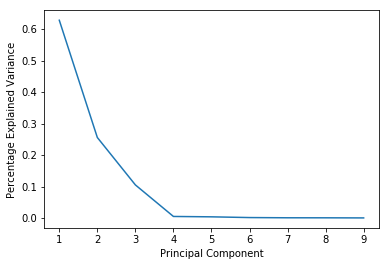

In [53]:
#Plot the explained variance
plt.plot(range(1,10),pca_model.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Percentage Explained Variance')
plt.show()

According to the figure above, the majority of the variance within the model can be explained using only the first four principal components. Since we know that most of these variables are highly correlated, a good assumption is that PCs 5 through 9 contain mostly noise and can be removed from consideration.

The following plot will illustrate the coefficients of each principal component as a combination of the original 10 variables.

Text(0,0.5,'Coefficient')

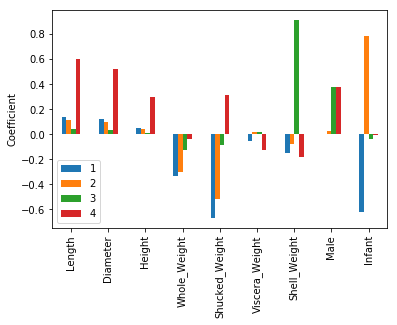

In [54]:
#Create a dataframe of the PCA components
df = pd.DataFrame(data=pca_model.components_)
df.index = dataset.columns
dfRed = df.loc[:,:3]
dfRed.columns = range(1,5)
dfRed.plot.bar()
plt.ylabel('Coefficient')

Using only the first 4 principal components, which explain the majority of the variance in the dataset, a multiple regression model can be created. The following code will remove the last 6 PCs and create a regression model.

In [55]:
#Remove the last 6 PCs
red_PCA = PCA(n_components=4)
red_PCA.fit(dataset)
rings = data['Rings'].values.reshape(len(data),1)
red_data = np.hstack([red_PCA.transform(dataset),rings])
red_df = pd.DataFrame(red_data,columns=['PC1','PC2','PC3','PC4','Rings'])

#### Split the data into training and test sets

In [276]:
# Import library and set test split parameters
from sklearn.model_selection import train_test_split
test_size = 0.3
seed = 7

In [56]:
# Split data into training and test datasets
train, test = train_test_split(red_df, test_size = test_size, random_state=seed)

In [57]:
# Assign X and y axes
X_train = train.drop(['Rings'],axis=1)
y_train = train['Rings']
X_test = test.drop(['Rings'],axis=1)
y_test = test['Rings']

In [58]:
# Fitting Linear Regression Model to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
#Take a look at the regression coefficients
dict(zip(list(X_train.columns),regressor.coef_))

{'PC1': 2.3272300814728988,
 'PC2': 1.2873302560498818,
 'PC3': -0.53084881585635202,
 'PC4': -23.565174453757344}

<a id='pca_validate'></a>
### PCA Validation
[Table of Contents](#toc) | [Section](#algoselect)

Again, let’s get a sense of how well the model performed by looking at a Y-Yhat plot and some basic performance metrics:

In [60]:
# Predicting the age
y_pred3 = regressor.predict(X_test)

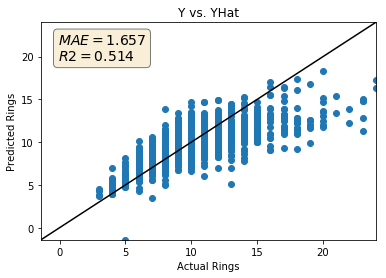

In [61]:
# Display chart
plot_yyhat(y_test, y_pred3)

<a id='nn'></a>
### Neural Network
[Table of Contents](#toc) | [Section](#algoselect)

Multilayer perceptrons can be used for a variety of purposes, including classification or function approximation. A perceptron accepts a number of inputs (variables), which usually include all the available information about the problem to be solved. The inputs are given weights as a linear combination within a hidden layer or layers that contains multiple nodes. The hidden layer(s) are passed through an activation function (e.g. a hard limit or sigmoid function). Finally, the output(s) are calculated from the activation function.

#### Data Preprocessing

In [62]:
# Import library and set test split parameters
from sklearn.model_selection import train_test_split
test_size = 0.3
seed = 7

In [63]:
# Split data into training and test datasets
train, test = train_test_split(data, test_size = test_size, random_state=seed)

In [64]:
# Assign X and y axes
X_train = train.drop(['Rings', 'Sex','Female'],axis=1)
y_train = train['Rings']
X_test = test.drop(['Rings', 'Sex','Female'],axis=1)
y_test = test['Rings']

In [65]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
# Build Neural Network
from sklearn.neural_network import MLPRegressor

# Initialising the NN
regressor = MLPRegressor(hidden_layer_sizes = [10,10],
                        alpha=0.00001,
                        learning_rate_init = 0.001,
                        max_iter = 1000)

In [67]:
# Fit Neural Network to Training set
regressor.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10, 10], learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

<a id='nn_validate'></a>
### Neural Network Validation
[Table of Contents](#toc) | [Section](#nn)

In [68]:
# Make Predictions
y_pred4 = regressor.predict(X_test)

In [69]:
# Calculate residual values
y_residuals = y_pred4 - y_test

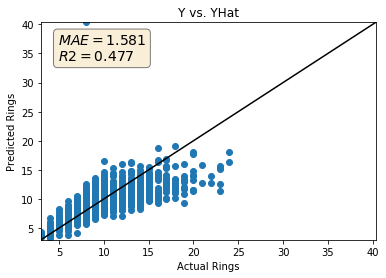

In [70]:
# Chart Results
plot_yyhat(y_test,y_pred4)

<a id='activation'></a>
#### Activation Function Selection
[Table of Contents](#toc) | [Section](#nn)

The initially chosen activation function was a logistic function. Let’s examine how the model behaves when other types of activation functions are selected:

In [71]:
#Obtain MAE from modifying the activation function
def activationResults(func):
    results = []
    regressor = MLPRegressor(hidden_layer_sizes = [10,10],
                        alpha=0.00001,
                        activation = func,
                        learning_rate_init = 0.001,
                        max_iter = 2000)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    results.append(mae)
    #rmse = mean_squared_error(y_test, y_pred)
    #results.append(rmse)
    return results

In [72]:
# Evaluate the activation functions
dictResults = {}
for func in ['identity','logistic','tanh','relu']:
    dictResults[func] = activationResults(func)
#Print the results
dictResults

{'identity': [1.6561624688452283],
 'logistic': [1.5623492362740252],
 'relu': [1.5867539499008503],
 'tanh': [1.5697234094643622]}

Based on the above results, the logistic and tanh functions achieved the lowest MAE, with a fairly close difference. Let’s select the logistic function. Note that model architecture may have an effect on the ideal activation function for a given dataset, so this step should ideally be performed in conjunction with other hyperparameter selection.

<a id='regularization'></a>
#### Regularization Parameter Selection
[Table of Contents](#toc) | [Section](#nn)

Next, we will select the ideal regularization parameter (alpha). 35 log-spaced values between 1e-6 and 1 will be tried (I did some quick manual investigation to restrict the hyperparameter space to alpha < 1).

Note- this code will run much more slowly, as the number of models is 35 instead of 4, as in the previous section.

In [73]:
# Obtain MAE from modifying alpha
def alphaResults(alpha):
    results = []
    regressor = MLPRegressor(hidden_layer_sizes = [10,10],
                        alpha=alpha,
                        activation = 'logistic',
                        learning_rate_init = 0.001,
                        max_iter = 2000)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    results.append(mae)
    #rmse = mean_squared_error(y_test, y_pred)
    #results.append(rmse)
    return results

In [74]:
# Evaluate the alpha parameter
results2 = []
alphas = np.logspace(-6, 0, num=35)
for alpha in alphas:
    results2.append(alphaResults(alpha))

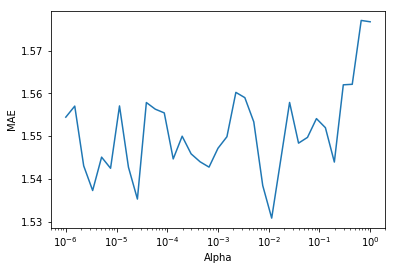

In [75]:
# Plot the results
plt.plot(alphas,results2)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.show()

Results are fairly stable for alpha < 0.1. Remember that model architecture will also affect these results, so the MAE noise between 1e-6 and 1e-1 is probably insignificant. Let’s choose alpha = 0.01.

<a id='hiddenlayer'></a>
#### Hidden Layer Architecture Selection
[Table of Contents](#toc) | [Section](#nn)

Next, we will examine varying the hidden layer architecture. Initially, two hidden layers with 10 nodes each was chosen.

In [76]:
#Obtain MAE from modifying the hidden layers
def hlayerResults(hlayer):
    results = []
    regressor = MLPRegressor(hidden_layer_sizes = hlayer,
                        alpha=0.01,
                        activation = 'logistic',
                        learning_rate_init = 0.001,
                        max_iter = 2000)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    results.append(mae)
    #rmse = mean_squared_error(y_test, y_pred)
    #results.append(rmse)
    return results

In [77]:
#Let's try some "typical" values, with 2 layers, all combinations
#of 5-spaced intervals
hlayers = [[x,y] for x in range(5,21,5) for y in range(5,21,5)]

#Now let's add a few "weirder" ones to see what happens:
hlayers.extend([[1,10],[10,1],[2,2],[10,2,10],[10,5,10],
                [20,5,20],[20,2,20],[10],[20]])
dfResults = pd.DataFrame(columns=['MAE'])
for hlayer in hlayers:
    dfResults.loc[str(hlayer)] = {'MAE' : hlayerResults(hlayer)}
#Print the results
dfResults.sort_values('MAE')

,MAE
"[20, 2, 20]",[1.53155052546]
"[10, 5]",[1.54020957774]
"[5, 5]",[1.54031010066]
"[10, 1]",[1.54375331943]
"[20, 10]",[1.54466410519]
"[5, 15]",[1.54540555344]
"[10, 15]",[1.54584738986]
"[5, 20]",[1.54624311834]
"[5, 10]",[1.54817987165]
"[20, 5]",[1.54915341502]


The best results were [15, 5] by a small margin. A hidden layer architecture of [15, 5] is not excessively large, considering there are 10 input variables, so the selection seems reasonable. However, [5,15] might have been a good choice, as well. (Determining a reasonable hidden layer architecture is a skill that comes with practice using many different types of datasets.)

<a id='learningrate'></a>
#### Learning Rate Selection
[Table of Contents](#toc) | [Section](#nn)

Finally, let’s select an appropriate learning rate. As the learning rate is most dependent on the hidden layer architecture, it should be performed last in this analysis, although of course as mentioned before, all hyperparameter selection should ideally be performed simultaneously.

In [78]:
#Obtain MAE from modifying the learning rate
def lrResults(lr):
    results = []
    regressor = MLPRegressor(hidden_layer_sizes = [15,5],
                        alpha=0.01,
                        activation = 'logistic',
                        learning_rate_init = lr,
                        max_iter = 2000)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    results.append(mae)
    #rmse = mean_squared_error(y_test, y_pred)
    #results.append(rmse)
    return results

In [79]:
# Evaluate the learning rate parameter
results4 = []
lrs = np.logspace(-4, -1, num=20)
for lr in lrs:
    results4.append(lrResults(lr))

/Users/wmemorgan/miniconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


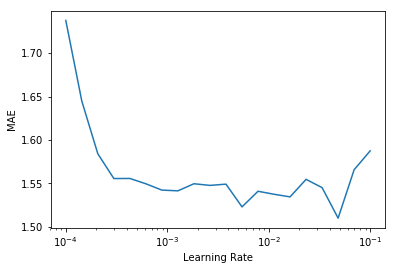

In [80]:
# Plot the results
plt.plot(lrs,results4)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('MAE')
plt.show()

Based on these results, any learning rate less than 10^-2 is appropriate.

---
<a id='modeling'></a>

## Model Training
[Table of Contents](#toc)

In [93]:
# Best Parameters
activation_func = 'logistic'
alpha = 0.01
hidden_layer = [10,5]
learning_rate = 0.01

In [94]:
# Initialising the NN
regressor = MLPRegressor(hidden_layer_sizes = hidden_layer,
                    alpha=alpha,
                    activation = activation_func,
                    learning_rate_init = learning_rate,
                    max_iter = 2000)

In [95]:
# Fit Neural Network to Training set
regressor.fit(X_train,y_train)

MLPRegressor(activation='logistic', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10, 5], learning_rate='constant',
       learning_rate_init=0.01, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [96]:
# Make Predictions
y_pred5 = regressor.predict(X_test)

In [97]:
# Calculate residual values
y_residuals = y_pred5 - y_test

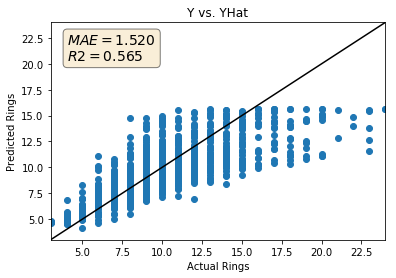

In [98]:
# Chart Results
plot_yyhat(y_test,y_pred5)

---
<a id='deployprep'></a>

## Deployment Preparation
[Table of Contents](#toc)

### Final Results

The best achieved MAE error was **1.52**, using a perceptron architecture with 2 hidden layers **([10,5])**, an alpha of **0.01**, a learning rate of **0.01**, and a ***logistic*** activation function. Compare these results to the ones obtained during Part 1, which achieved a MAE of 1.639.

Despite the higher accuracy of the neural network, there are several disadvantages to neural network modeling, including the difficulty of hyperparameter tuning. Notice that we simply used a trial-and-error process to select the hyperparameters. There are very few hard-and-fast rules for selecting appropriate hyperparameters, and it can often be more of an art than a science.

Although cross-validation is meant to minimize over-generalization, sometimes it is necessary to manually examine models for potential over-fitting issues. Being able to quickly and easily interpret models can be a significant advantage in many cases. Of course, if all you need is accuracy, neural networks might be a great choice.

And after all this work, did we actually solve the core problem? Personally, I would say no. An MAE of **~1.5 rings** is not good enough for the researchers to no longer need to measure the rings manually. I would recommend the manual ring measuring process in this case, unfortunately.